In [77]:
import math
import pandas as pd
from scipy.stats import gaussian_kde
from sklearn.neighbors import KernelDensity
from FlowCytometryTools import FCMeasurement
from statsmodels.distributions.empirical_distribution import ECDF

In [78]:
fcs_dir = 'C:/Users/lzoeckler/Desktop/maria_data/Archive_facs'

In [79]:
test = FCMeasurement(ID='', datafile='{}/1.fcs'.format(fcs_dir))
fcs_data = test.data
fcs_channels = test.channels

Encountered an illegal utf-8 byte in the header.
 Illegal utf-8 characters will be ignored.
'utf-8' codec can't decode byte 0xaa in position 101: invalid start byte
Encountered an illegal utf-8 byte in the header.
 Illegal utf-8 characters will be ignored.
'utf-8' codec can't decode byte 0xaa in position 101: invalid start byte


In [80]:
print(len(fcs_data), 'observations')
print(type(fcs_data))
fcs_data.head()

10000 observations
<class 'pandas.core.frame.DataFrame'>


,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL1-A,FL4-H
0,395.0,205.0,468.0,416.0,419.0,13.0,451.0
1,237.0,385.0,516.0,453.0,454.0,22.0,470.0
2,190.0,148.0,552.0,477.0,489.0,32.0,527.0
3,487.0,169.0,579.0,529.0,553.0,41.0,553.0
4,419.0,185.0,525.0,465.0,470.0,25.0,512.0


In [81]:
test = fcs_data.loc[fcs_data['FL1-A'] > 0]
test['FL1-A'] = test['FL1-A'].apply(math.log)
test.head()

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL1-A,FL4-H
0,395.0,205.0,468.0,416.0,419.0,2.564949,451.0
1,237.0,385.0,516.0,453.0,454.0,3.091042,470.0
2,190.0,148.0,552.0,477.0,489.0,3.465736,527.0
3,487.0,169.0,579.0,529.0,553.0,3.713572,553.0
4,419.0,185.0,525.0,465.0,470.0,3.218876,512.0


In [82]:
FSC_ecdf = ECDF(test['FSC-H'])
test['FSC-H'] = FSC_ecdf(test['FSC-H'])
SSC_ecdf = ECDF(test['SSC-H'])
test['SSC-H'] = SSC_ecdf(test['SSC-H'])
test.head()

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL1-A,FL4-H
0,0.787215,0.648359,468.0,416.0,419.0,2.564949,451.0
1,0.366547,0.883353,516.0,453.0,454.0,3.091042,470.0
2,0.264206,0.452781,552.0,477.0,489.0,3.465736,527.0
3,0.970988,0.536715,579.0,529.0,553.0,3.713572,553.0
4,0.853341,0.590336,525.0,465.0,470.0,3.218876,512.0


In [83]:
sub_test = test.loc[(test['FSC-H'] >= .4) & (test['FSC-H'] <= .95)]
sub_test = sub_test.loc[(test['SSC-H'] >= .05) & (test['SSC-H'] <= .6)]
sub_test.head()

,FSC-H,SSC-H,FL1-H,FL2-H,FL3-H,FL1-A,FL4-H
4,0.853341,0.590336,525.0,465.0,470.0,3.218876,512.0
6,0.915066,0.449080,460.0,424.0,470.0,2.484907,483.0
7,0.703481,0.405362,473.0,422.0,434.0,2.639057,466.0
8,0.889156,0.494398,542.0,488.0,500.0,3.367296,521.0
9,0.585434,0.417167,418.0,309.0,421.0,2.079442,418.0


In [84]:
for_sk = sub_test['FL1-A'].as_matrix().reshape(-1,1)
for_sp = sub_test['FL1-A']

C:\Users\lzoeckler\miniconda3\envs\DIAMETER\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [85]:
d1 = KernelDensity().fit(for_sk)
d1

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
              kernel='gaussian', leaf_size=40, metric='euclidean',
              metric_params=None, rtol=0)

In [86]:
d2 = gaussian_kde(for_sp).evaluate(for_sp)
d2

array([0.87968401, 0.25872959, 0.2908796 , ..., 1.06886877, 1.10782862,
       0.73468708])

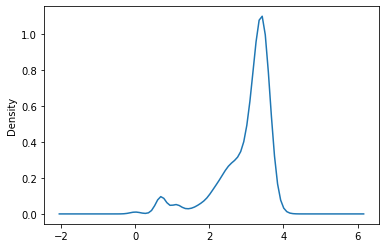

In [87]:
sub_test['FL1-A'].plot.kde(ind=100)

In [20]:
test.channels

,$PnN,$PnR,$PnB,$PnE,$PnS
Channel Number,,,,,
1,FSC-H,1024,16,"[0, 0]",FSC-Height
2,SSC-H,1024,16,"[0, 0]",SSC-Height
3,FL1-H,1024,16,"[4, 0]",FITC
4,FL2-H,1024,16,"[4, 0]",None
5,FL3-H,1024,16,"[4, 0]",None
6,FL1-A,1024,16,"[0, 0]",None
7,FL4-H,1024,16,"[4, 0]",None
